# CROP

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
%matplotlib inline

In [10]:
import time

In [13]:
def crop(input, w_div=3, h_div=3):
    k=0
    im = Image.open(input)
    imgwidth, imgheight = im.size
    width=np.ceil(imgwidth/w_div).astype(int)
    height=np.ceil(imgheight/h_div).astype(int)
    gs = gridspec.GridSpec(h_div,w_div)
    gs.update(wspace=0.025, hspace=0.025)
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            box = (j, i, j+width, i+height)
            a = im.crop(box)
            pt = plt.subplot(gs[k])
            pt.imshow(np.asarray(a))
            pt.axis('off')
            k+=1
    plt.show()
    time.sleep(2)

In [80]:
def step(input, width=80, height=60, h_stride=50, v_stride=10):
    k=0
    im = Image.open(input)
    imgwidth, imgheight = im.size
    for i in range(0,imgheight,v_stride):
        for j in range(0,imgwidth,h_stride):
            k+=1
            box = (j, i, j+width, i+height)
            a = im.crop(box)
            plt.imshow(np.array(a))
            plt.axis('off')
            plt.show()
            if k==80:
                break

In [ ]:
path = 'C:\\Users\\Utkarsh\\Pictures'
imgs = [os.path.join(path,x) for x in os.listdir(path) if x.split('.')[-1]=='jpg' or x.split('.')[-1]=='png']
for pic in imgs:
    crop(pic)

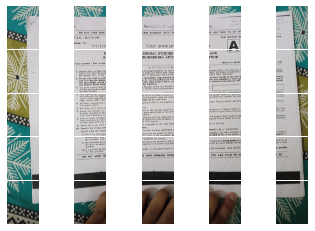

In [14]:
crop('C:\\Users\\Utkarsh\\Pictures\\2.jpg',5,5)

In [ ]:
step('C:\\Users\\Utkarsh\\Pictures\\2.jpg')

In [40]:
def step_np(W=100,H=150,ws=50,hs=50):
    im=np.asarray(Image.open('C:\\Users\\Utkarsh\\Pictures\\2.jpg'))
    for x in range(0,im.shape[0]-W+1,ws):
        for y in range(0,im.shape[1]-H+1,hs):
            a=im[x:x+W,y:y+H]
            plt.imshow(a)
            plt.show()

In [8]:
tiles = [im[x:x+M,y:y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]

NameError: name 'im' is not defined

In [12]:
arr = np.arange(1,101).reshape(10, -1)

In [39]:
W=6
H=4
ws=3
hs=3
for x in range(0,arr.shape[0]-W+1,ws):
    for y in range(0,arr.shape[1]-H+1,hs):
        print(arr[x:x+W,y:y+H])

[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]]
[[ 4  5  6  7]
 [14 15 16 17]
 [24 25 26 27]
 [34 35 36 37]
 [44 45 46 47]
 [54 55 56 57]]
[[ 7  8  9 10]
 [17 18 19 20]
 [27 28 29 30]
 [37 38 39 40]
 [47 48 49 50]
 [57 58 59 60]]
[[31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]
 [81 82 83 84]]
[[34 35 36 37]
 [44 45 46 47]
 [54 55 56 57]
 [64 65 66 67]
 [74 75 76 77]
 [84 85 86 87]]
[[37 38 39 40]
 [47 48 49 50]
 [57 58 59 60]
 [67 68 69 70]
 [77 78 79 80]
 [87 88 89 90]]


In [ ]:
def step_np(W=100,H=150,ws=50,hs=50):
    im=np.asarray(Image.open('C:\\Users\\Utkarsh\\Pictures\\2.jpg'))
    for x in range(0,im.shape[0]-W+1,ws):
        for y in range(0,im.shape[1]-H+1,hs):
            a=im[x:x+W,y:y+H]
            plt.imshow(a)
            plt.show()

# Extract Text

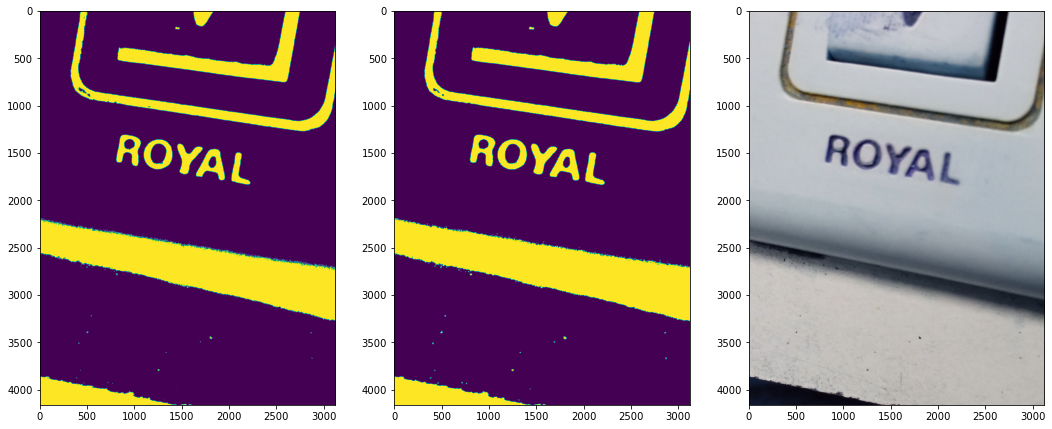

In [24]:
import cv2
import matplotlib.pyplot as plt
import matplotlib

img = cv2.imread('C:\\Users\\Utkarsh\\Pictures\\6.jpg')
image= img.copy()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = 255 - cv2.threshold(blur, 0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# Dilate to combine adjacent text contours
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,2))
dilate = cv2.dilate(thresh, kernel, iterations=2)

# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
ROI_images = []
for c in cnts:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    if area > 1000 and 12<h<18:
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)
        ROI = img[y:y+h, x:x+w]
        # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        ROI_number += 1
        ROI_images.append(ROI)

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(18)
plt.subplot(131)
plt.imshow(thresh)
plt.subplot(132)
plt.imshow(dilate)
plt.subplot(133)
plt.imshow(image)
plt.show()

# Final

In [ ]:
def step_np(W=100,H=150,ws=50,hs=50):
    im=np.asarray(Image.open('C:\\Users\\Utkarsh\\Pictures\\2.jpg'))
    for x in range(0,im.shape[0]-W+1,ws):
        for y in range(0,im.shape[1]-H+1,hs):
            a=im[x:x+W,y:y+H]
            plt.imshow(a)
            plt.show()

In [4]:
def step_np_try(W=100,H=150,ws=50,hs=50):
    im=np.asarray(Image.open('C:\\Users\\Utkarsh\\Pictures\\2.jpg'))
    mask = np.zeros((im.shape[0],im.shape[1]), dtype=int)
    for x in range(0,im.shape[0]-H+1,hs):
        for y in range(0,im.shape[1]-W+1,ws):
            a=im[x:x+H,y:y+W]
            # if text present
                # add one to mask slice
            
            plt.imshow(a)
            plt.show()
            return

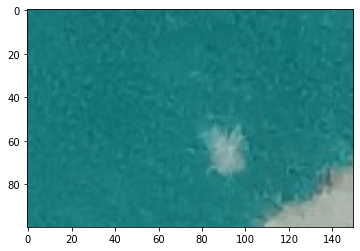

In [3]:
step_np_try()

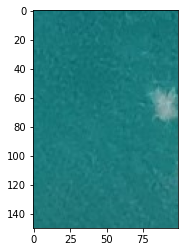

In [5]:
step_np_try()

In [55]:
im=np.asarray(Image.open('C:\\Users\\Utkarsh\\Pictures\\2.jpg'))
mask = np.ones((im.shape[0],im.shape[1]), dtype=int)
print(mask.shape)

(4160, 3120)


# "No" train data

## Delete unwanted files

In [26]:
import os
import shutil

In [2]:
path='C:\\Users\\Utkarsh\\Downloads\\HDR-20210607T185553Z-001'

In [25]:
for x in os.listdir(path):
    pth = os.path.join(path,x)
    for y in os.listdir(pth):
        if y!='NAT':
            try:
                shutil.rmtree(os.path.join(pth,y))
            except OSError:
                os.remove(os.path.join(pth,y))

In [71]:
for x in os.listdir(path):
    pth = os.path.join(path,x,'NAT')
    for y in os.listdir(pth):
        p=os.path.join(pth,y)
        if os.path.isdir(p):
            for z in os.listdir(p):
                q = os.path.join(p,z)
                _,ext = os.path.splitext(q)
                if ext!='.jpg' and ext!='.png' and ext!='.jpeg':
                    os.remove(q)
        else:
            os.remove(p)
        try:
            os.rmdir(p)
        except OSError:
            pass
    try:
        os.rmdir(pth)
    except OSError:
        pass

In [73]:
for x in os.listdir(path):
    pth = os.path.join(path,x)
    try:
        os.rmdir(pth)
    except OSError:
        pass

# Prediction time Crops

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path='C:\\Users\\Utkarsh\\Downloads\\HDR-20210607T185553Z-001'

Box is moved and mask is created.  
The last cell is shifted extra to cover full image

In [212]:
def func1(path,p,r):
    inp=os.path.join(path,p)
    im=Image.open(inp)
    plt.imshow(im)
    plt.show()
    imgwidth, imgheight = im.size
    S=int(min(imgwidth, imgheight)//r)
    ss=S//2
    mask=np.zeros((imgheight,imgwidth), dtype=int)
    for i in range(0,imgheight-ss,ss):
        for j in range(0,imgwidth-ss,ss):
            if i+S>imgheight and j+S>imgwidth:
                box=(imgwidth-S, imgheight-S, imgwidth, imgheight)
            elif j+S>imgwidth:
                box=(imgwidth-S, i, imgwidth, i+S)
            elif i+S>imgheight:
                box=(j, imgheight-S, j+S, imgheight)
            else:
                box = (j, i, j+S, i+S)
            a = im.crop(box)
            mask[i:i+S,j:j+S]+=1
            plt.imshow(mask)
            plt.show()
            plt.imshow(a)
            plt.show()

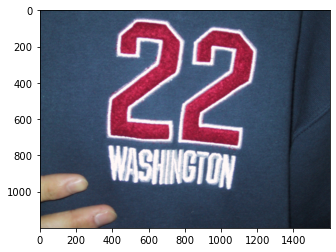

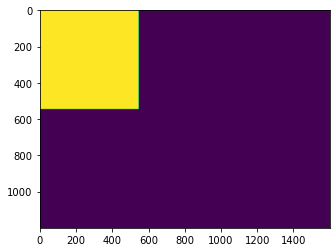

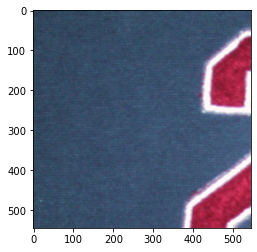

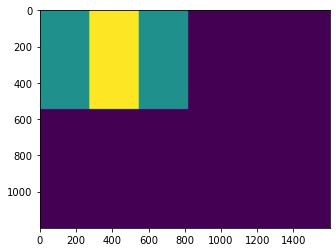

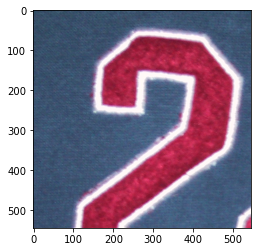

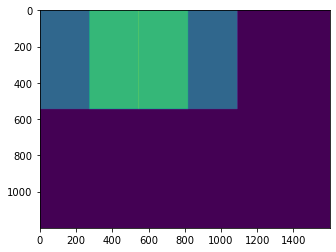

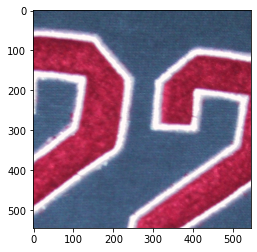

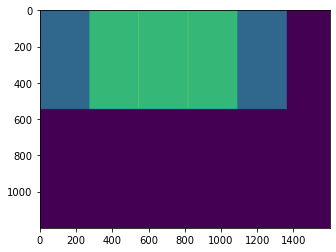

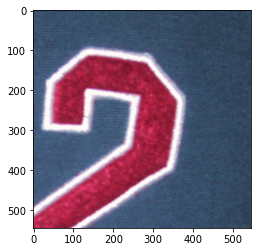

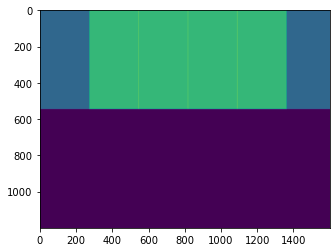

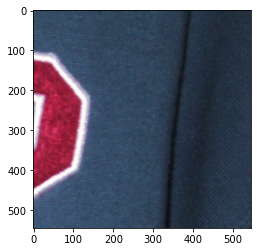

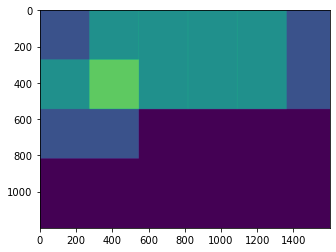

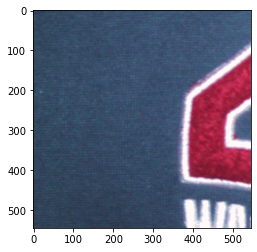

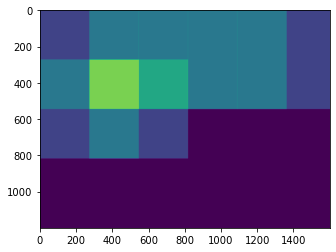

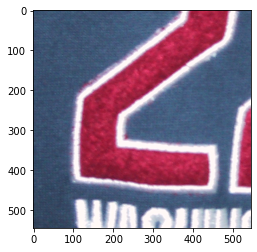

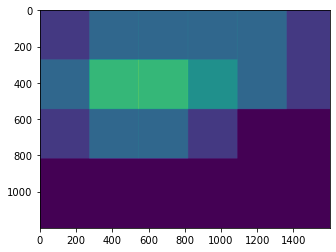

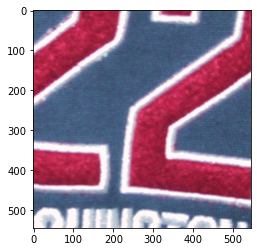

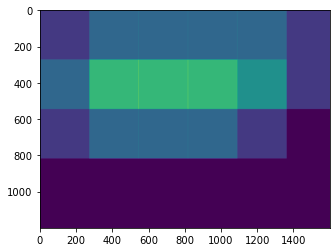

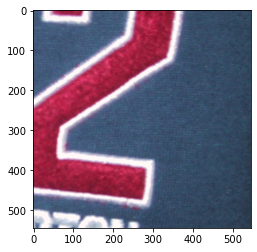

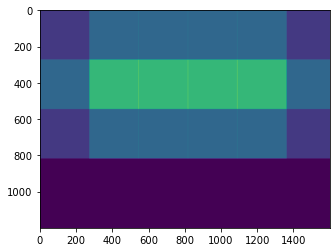

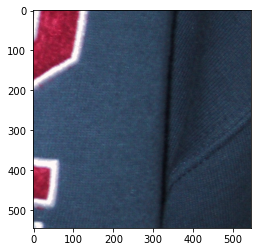

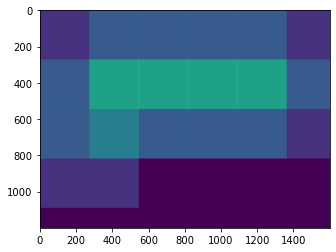

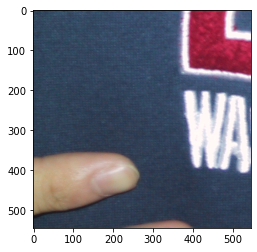

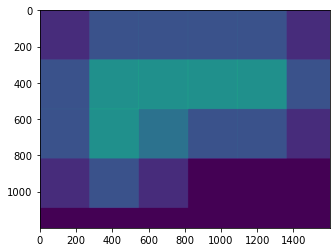

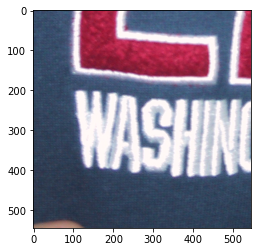

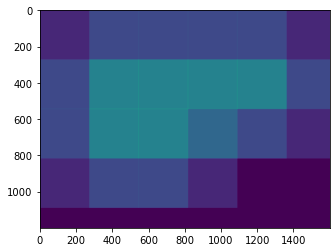

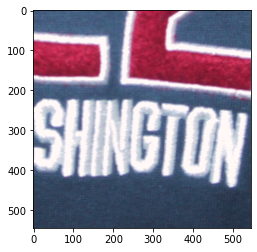

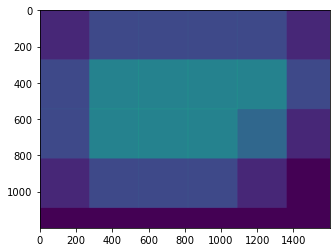

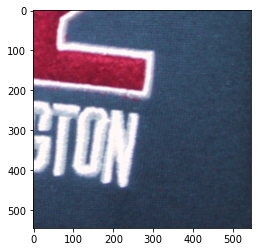

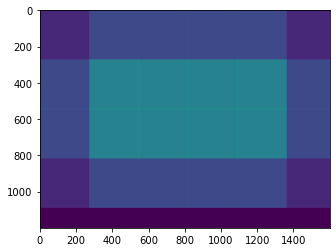

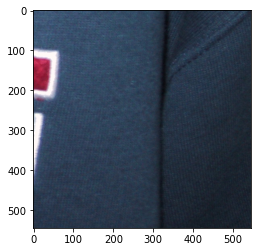

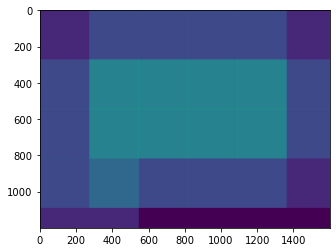

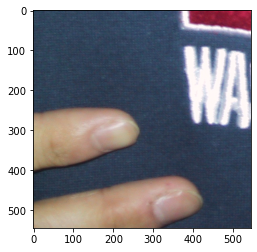

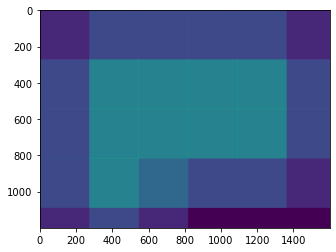

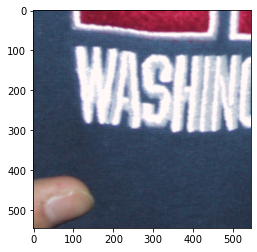

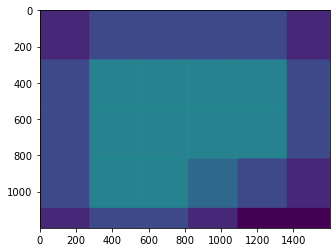

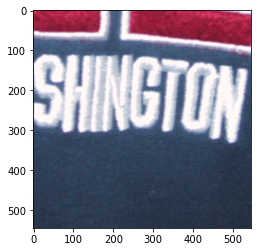

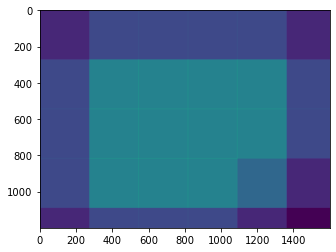

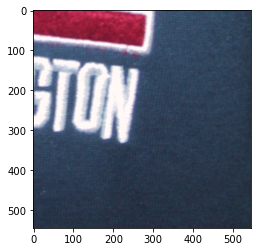

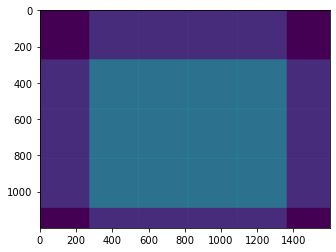

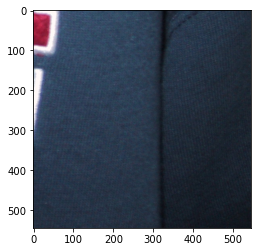

1200 1600
5435148


In [213]:
path1='C:\\Users\\Utkarsh\\Projects\\OCR\\DataSet\\ICDAR_2003__Sample_Box\\scene'
for p in os.listdir(path1):
    for r in 1/np.arange(0.05,0.5,0.045)[::-1]:
        func1(path1,p,r)
        break
    break

In [199]:
3120-1418

1702

In [203]:
1419//2

709

In [204]:
1418+709+1419

3546

In [205]:
3546-3120

426

In [19]:
1/np.arange(0.05,0.5,0.045)

array([20.        , 10.52631579,  7.14285714,  5.40540541,  4.34782609,
        3.63636364,  3.125     ,  2.73972603,  2.43902439,  2.1978022 ])

In [ ]:
## for r in 1/np.arange(0.05,0.5,0.045):

In [145]:
1.1+2.2

3.3000000000000003

In [68]:
for x in range(0,10,2):
    print(x)

0
2
4
6
8


In [ ]:
imgwidth-((imgwidth-ss)//ss)*ss

In [102]:
x=np.zeros((10,10))

In [106]:
x[2:5,3:7]+=1

In [108]:
x[6:9,7:13]+=1

In [110]:
x

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

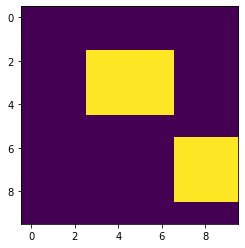

In [109]:
plt.imshow(x)

In [184]:
W=1234567
SS=100
S=2000

In [187]:
(W-((W-S)//SS)*SS)/((W-S)//SS)

0.1677079107505071

In [188]:
(W/((W-S)//SS))-SS

0.16770791075050795